# Content
- Population vs. Sample
- Weighted Mean
- Measure of Central Tendency
- Measure of variation (variance, STD, COV)
- Measure of position (percentile, quartile, decile, IQR)
- Exploratory data analysis (5-Number Summary)

In [134]:
# Imports
import math
import statistics

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Population vs. Sample

** Nomenclature **

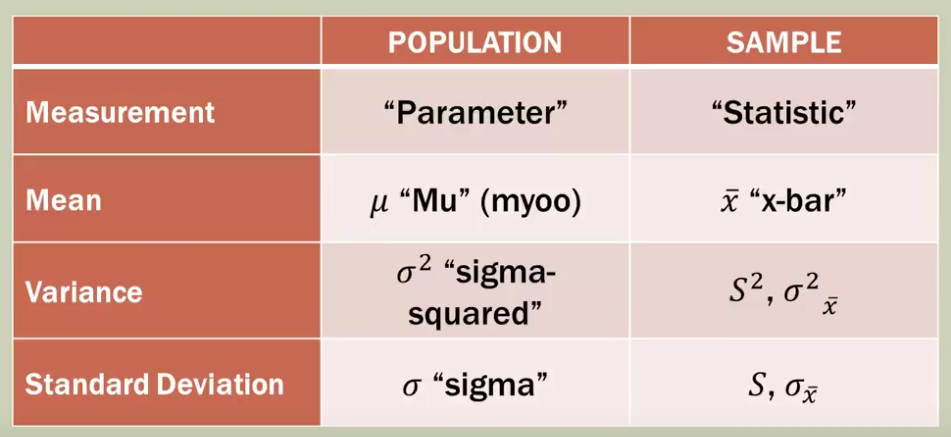

# Weighted Mean

Instead of each data point contributing equally to the final mean, some data points contribute more “weight” than others. If all the weights are equal, then the weighted mean equals the arithmetic mean.

Sample problem: You take three 100-point exams in your statistics class and score 80, 80 and 95. The last exam is much easier than the first two, so your professor has given it less weight. The weights for the three exams are:

    Exam 1: 40 % of your grade.
    Exam 2: 40 % of your grade.
    Exam 3: 20 % of your grade.

What is your final weighted average for the class?

    Multiply the numbers in your data set by the weights:
    .4(80) = 32
    .4(80) = 32
    .2(95) = 19
    Add the numbers up. 32 + 32 + 19 = 83.

# Variance and Standard Deviation

In [20]:
# Data
frequency_list =  [1, 2, 3, 5, 4, 3, 2]
midpoint_list = [8, 13, 18, 23, 28, 33, 38]

pre_processed_list = list()

for f, m in zip(frequency_list, midpoint_list):
    for i in range(f):
        pre_processed_list.append(m)
    
print(pre_processed_list)
print(len(pre_processed_list))

[8, 13, 13, 18, 18, 18, 23, 23, 23, 23, 23, 28, 28, 28, 28, 33, 33, 33, 38, 38]
20
23


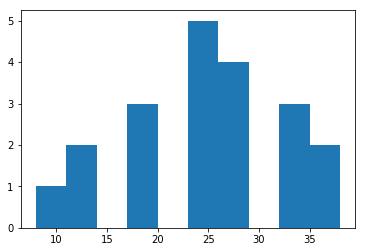

In [132]:
plt.hist(pre_processed_list)
plt.show()

In [21]:
# Statistics
calc_min = min(pre_processed_list)
calc_max = max(pre_processed_list)
calc_range = calc_max - calc_min
calc_rule_of_thumb_standard_deviation = calc_range/4
calc_n = len(pre_processed_list)
calc_mean = sum(pre_processed_list)/calc_n
calc_median = statistics.mode(pre_processed_list)
calc_mode = max(set(pre_processed_list), key=pre_processed_list.count)

# Identify type of distribution
calc_distribution_type = 'random'
if calc_mean == calc_median == calc_mode:
    calc_distribution_type = 'symmetric'
elif calc_mean <= calc_median <= calc_mode:
    calc_distribution_type = 'left-skewed (negatively skewed)'
elif calc_mean >= calc_median >= calc_mode:
    calc_distribution_type = 'right-skewed (positively skewed)'

# Calculate sample variance, STD and CoV(n-1)
temp_x_minus_mean_square = 0
for i in pre_processed_list:
    temp_x_minus_mean_square += (i-calc_mean)**2
    
calc_variance = temp_x_minus_mean_square/(calc_n-1)
calc_standard_deviation = math.sqrt(calc_variance)
calc_coefficient_of_variation = calc_standard_deviation/calc_mean * 100

# Output results
print('min:', calc_min)
print('max:', calc_max)
print('rule of thumb std:', calc_rule_of_thumb_standard_deviation)
print('n:', calc_n)
print('mean:', round(calc_mean))
print('median:', round(calc_median))
print('mode:', round(calc_mode))
print('distribution type:', calc_distribution_type)
print('variance:', round(calc_variance))
print('std:', round(calc_standard_deviation, 2))
print('cov:', str(round(calc_coefficient_of_variation)) + '%') # comparing the variation of 2 different datasets

min: 8
max: 38
rule of thumb std: 7.5
n: 20
mean: 24
median: 23
mode: 23
distribution type: right-skewed (positively skewed)
variance: 69
std: 8.29
cov: 34%


# Chebyshev's Theorem

## The Theorem
Chebyshev's theorem show how to use the mean and the standard deviation to find the percentage of the total observations that fall within a given interval about the mean. 

**Chebyshev's theorem:** For any number k greater than 1, at least of the data values lie k standard deviations of the mean. This applies to **every distribution** regardless of its shape.

In [22]:
def chebyshev(k):
    formula = (1 - 1/k**2) * 100
    print('{:0.2f}% percentage of the data values that fall within {} standard deviation'.format(formula, k))
    return formula

for i in range(2, 7):
    chebyshev(i)

75.00% percentage of the data values that fall within 2 standard deviation
88.89% percentage of the data values that fall within 3 standard deviation
93.75% percentage of the data values that fall within 4 standard deviation
96.00% percentage of the data values that fall within 5 standard deviation
97.22% percentage of the data values that fall within 6 standard deviation


## The Emperical (Normal) Rule
This rule **applies only to data following a normal distribution**.
Six sigma only applies to normal distribution.

Rule is simple:
- Approx 68.0% of the data falls within **1** std of the mean
- Approx 95.0% of the data falls within **2** std of the mean
- Approx 99.7% of the data falls within **3** std of the mean

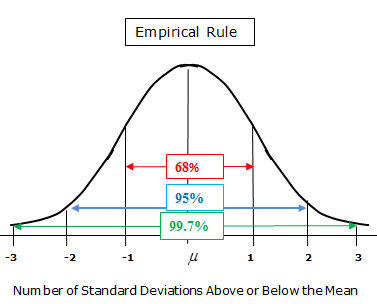

# Measures of Position

Locate the **relative position of a single value with respect to all values in the dataset**.

Measures include: 
- **Standard scores (z-score)**: tells how many STD a data point is below or above the mean.
- **Percentiles**: divide the dataset into 100 equal groups.
- **Deciles**: divide the dataset into 10 equal groups.
- **Quartiles**: divide the dataset into 4 equal groups, separated by Q1, Q2, Q3.

**mean = z-score of 0 = 50th percentile = 5th decile = 2nd quartile**

## z-score

In [29]:
# Exam A (value = number of points)
value = 38
mean = 40
s = 5
z1 = (value - mean)/s

# Exam B (value = number of points)
value = 94
mean = 100
s = 10
z2 = (value - mean)/s

print('z-score exam A =', z1)
print('z-score exam B =', z2)

best_score = 'A' if z1 > z2 else 'B'
worst_score = 'A' if z2 > z1 else 'B'
print('The score for exam', best_score, 'is relatively higher than the score for exam', worst_score)

z-score exam A = -0.4
z-score exam B = -0.6
The score for exam A is relatively higher than the score for exam B


## Percentiles

In [109]:
def find_x_for_percentile(percentile, list_input):
    list_sorted = sorted(list_input)
    values_count = len(list_sorted)
    x_pos = values_count * percentile/100

    if x_pos.is_integer():
        x_pos = int(x_pos)
        x = (list_sorted[x_pos-1] + list_sorted[x_pos]) / 2
    else:
        x_pos = int(math.ceil(x_pos))
        x = list_sorted[x_pos-1]

    return int(x)


def find_percentile_for_x(x, list_input):
    list_sorted = sorted(list_input)
    
    values_below_x = sum(i < x for i in list_sorted)
    values_count = len(list_sorted)
    percentile = (values_below_x + 0.5)/values_count * 100
    
    return percentile

In [110]:
student_score_list = [18, 15, 12, 6, 8, 2, 3, 5, 20, 10]

# Find percentile rank for score of
x = 6
percentile = find_percentile_for_x(x, student_score_list)
percentile_formatted = '{:0.2f}%'.format(percentile)
print('Exercise 1: the score', x, 'is better than', percentile_formatted, 'of scores')

# Find score corresponding to the th percentile
percentile = 35
x = find_x_for_percentile(percentile, student_score_list)
print('Exercise 2: the value', x, 'corresponds to the', str(percentile) + 'th', 'percentile')

Exercise 1: the score 6 is better than 35.00% of scores
Exercise 2: the value 6 corresponds to the 35th percentile


## Quartiles and Deciles

Use same calculation as percentiles.

**Interquartile range (IQR)** = Q3 - Q1

IQR is used to identify outliers and measure of variability.

## Find outliers

In [123]:
student_score_list2 = [5, 6, 12, 13, 15, 18, 22, 50]
student_score_list_sorted2 = sorted(student_score_list2)

# Calculate quartiles
q1_x = find_x_for_percentile(25, student_score_list_sorted2)
q2_x = find_x_for_percentile(50, student_score_list_sorted2)
q3_x = find_x_for_percentile(75, student_score_list_sorted2)

# Calculate IQR
iqr = q3_x - q1_x

# Adjust IQR according to formula (* 1.5)
iqr_adjusted = iqr * 1.5
reasonable_interval = [q1_x-iqr_adjusted, q3_x+iqr_adjusted]

# Find outliers
outlier_list = [str(x) for x in student_score_list_sorted2 if x < reasonable_interval[0] or x > reasonable_interval[1]]

print('Q1:', q1_x)
print('Q2:', q2_x)
print('Q3:', q3_x)
print('IQR:', iqr)
print('')
print('Reasonable interval from', reasonable_interval[0], 'to', reasonable_interval[1])
print('Outliers:', ','.join(outlier_list))

Q1: 9
Q2: 14
Q3: 20
IQR: 11

Reasonable interval from -7.5 to 36.5
Outliers: 50


# The 5-Number Summary

A whisker plot shows:
- minimum value
- lower quartile
- median
- upper quartile
- maximum value

**It does not show the mean!**

In [162]:
meteorite_count_list = [89, 47, 164, 296, 30, 215, 138, 78, 48, 39]

df = pd.DataFrame(np.array(meteorite_count_list).reshape(10,1), columns = ['freq'])

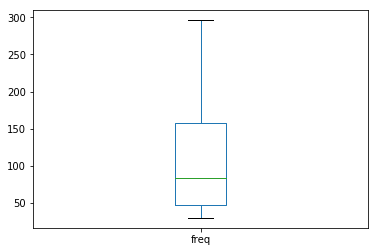

In [163]:
# box and whisker plots (5-Number Summary)
df.plot(
    kind='box'
)
plt.show()

In [160]:
df.describe() # Shows sample STD

,freq
count,10.000000
mean,114.400000
std,88.094898
min,30.000000
25%,47.250000
50%,83.500000
75%,157.500000
max,296.000000


In [161]:
cov = np.std(df)/np.mean(df) * 100
print('COV:', '{:0.2f}%'.format(float(cov)))

COV: 73.05%


There is a huge variation in this data and it is not normally distributed.